<div style="background: linear-gradient(135deg, #A8D8EA, #F8C8DC); color:#000000; padding:20px; border-radius:25px; font-size:18px; font-style:italic; box-shadow:4px 4px 12px rgba(0,0,0,0.15);">
Nama: Erika Desi Saputri <br>
NIM: 240907502025
</div>

<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Import Library
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Regresi dengan Data Random
</div>

In [2]:
np.random.seed(8)
x = 2 * np.random.randn(115) + 6
res = 0.7 * np.random.randn(115)
y = 8 + 0.5 * x + res

df = pd.DataFrame(
    {'x': x,
     'y': y}
)

df

,x,y
0,6.182409,11.960728
1,8.182565,11.703853
2,2.106059,8.547147
3,3.227301,9.213566
4,1.407017,7.730506
...,...,...
110,2.318903,8.705187
111,6.810082,11.919974
112,9.264601,12.593164
113,5.554522,10.189789


<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Regresi Sederhana
</div>

alpha = 7.845143948996664
beta = 0.5155535788365867


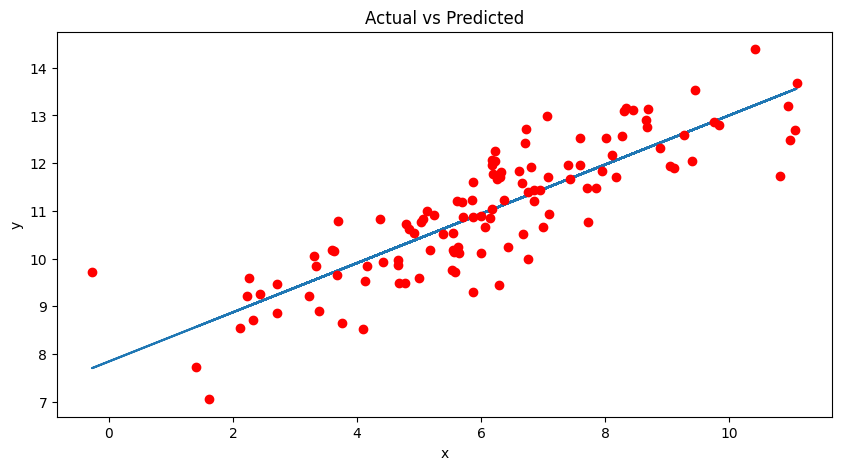

In [3]:
#Hitung mean X dan y
xmean = np.mean(x)
ymean = np.mean(y)

#Hitung covariance dan variance
df["xycov"] = (df["x"] - xmean) * (df["y"] - ymean)
df["xvar"] = (df["x"] - xmean)**2

#Hitung beta and alpha
beta = df["xycov"].sum() / df["xvar"].sum()
alpha = ymean - (beta*xmean)
print(f"alpha = {alpha}")
print(f"beta = {beta}")

#Fungsi prediksi
ypred = alpha + beta * x     

#Plot regresi untuk data aktual
plt.figure(figsize=(10, 5))
plt.plot(x, ypred)
plt.plot(x, y, "ro")
plt.title("Actual vs Predicted")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Regresi dan Plot 3D
</div>

In [4]:
#Mengahasilkan data acak
np.random.seed(21)
x1 = np.random.randint(1, 71, 62)
x2 = np.random.randint(3, 81, 62)
y = 10 + 2 * x1 + 3 * x2 + np.random.normal(0, 25, 62)

#Membuat dataframe
df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": y
})

#Analisis regresi berganda
x =sm.add_constant(df[["x1", "x2"]])
model = sm.OLS(df["y"], x).fit()

#Mendapatkan koefisien regresi
koefisien = model.params

#Scatter plot 3D
scatter_plot = go.Scatter3d(
    x=df["x1"],
    y=df["x2"],
    z=df["y"], 
    mode="markers",
    marker=dict(
        size=5,
        color="blue",
        opacity=0.8
    ),
    name="Data"
)

#Membuat grid untuk permukaan regresi
x1_grid, x2_grid = np.meshgrid(np.linspace(1, 50, 10), np.linspace(3, 60, 10))
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

#Permukaan regresi 3D
regresion_surface = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred,
    colorscale="Purples",
    opacity=0.5,
    name="Garis Regresi"
)

#Membuat layout plot
layout = go.Layout(
    title="Scatter Plot 3D dengan Garis Regresi Berganda",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="y"
    ),
    showlegend=True 
)

#Membuat figure dengan scatter plot dan permukaan regresi
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)

#Menampilkan plot
fig.show()